In [1]:
import gensim
import pandas as pd
import pickle


In [4]:
exp = pd.read_table("../EXP/expression.tsv", sep="\t", header=0, index_col=0)


In [5]:
neighbor_file = "../neighbors/neighbor_dict.pkl"
with open(neighbor_file, "rb") as f:
    nbs = pickle.load(f)


In [6]:
sentences = []
for key, val in nbs.items():
    if len(val) > 0:
        sentence = [key] + val
        sentences.append(sentence)
print(len(sentences))


32181


In [8]:
from gensim.models import Word2Vec
import logging


In [9]:
logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s", level=logging.INFO)

sent = sentences
model = Word2Vec(
    sent, 
    vector_size=1000, 
    window=5,
    min_count=1,
    workers=4,
    compute_loss=True
)
model.get_latest_training_loss()

train_stats = model.train(sent, total_examples=len(sent), epochs=10) 
model.get_latest_training_loss()


2025-01-30 12:06:12,387 : INFO : collecting all words and their counts
2025-01-30 12:06:12,388 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2025-01-30 12:06:12,632 : INFO : PROGRESS: at sentence #10000, processed 3770937 words, keeping 30874 word types
2025-01-30 12:06:12,880 : INFO : PROGRESS: at sentence #20000, processed 7449473 words, keeping 31846 word types
2025-01-30 12:06:13,155 : INFO : PROGRESS: at sentence #30000, processed 11213738 words, keeping 32161 word types
2025-01-30 12:06:13,206 : INFO : collected 32181 word types from a corpus of 11928825 raw words and 32181 sentences
2025-01-30 12:06:13,206 : INFO : Creating a fresh vocabulary
2025-01-30 12:06:13,248 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 32181 unique words (100.00% of original 32181, drops 0)', 'datetime': '2025-01-30T12:06:13.248004', 'gensim': '4.3.3', 'python': '3.11.10 | packaged by conda-forge | (main, Oct 16 2024, 01:27:36) [GCC 13.3.0]', 'plat

0.0

In [10]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def visualize_embeddings_t_sne(model, n_words=100):
    """
    Visualize Word2Vec embeddings using t-SNE.

    Args:
        model (gensim.models.Word2Vec): Trained Word2Vec model.
        n_words (int): Number of words to visualize (default: 100).
    """
    
    # Get the word embeddings and corresponding labels
    words = list(model.wv.index_to_key)
    word_vectors = np.array([model.wv[word] for word in words])

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=10000)
    reduced_embeddings = tsne.fit_transform(word_vectors)

    # Plot the embeddings
    plt.figure(figsize=(12, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=50, alpha=0.7, edgecolors='k')

    # Annotate the points with words
#    for i, word in enumerate(words):
#        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=10, alpha=0.75)
#
    plt.title('t-SNE Visualization of Word2Vec Embeddings')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.grid(True)
    plt.show()

# Example usage with a trained Word2Vec model
# Replace `model` with your trained Word2Vec instance
# visualize_embeddings_t_sne(model, n_words=100)


/home/llan/miniconda3/envs/gensim/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


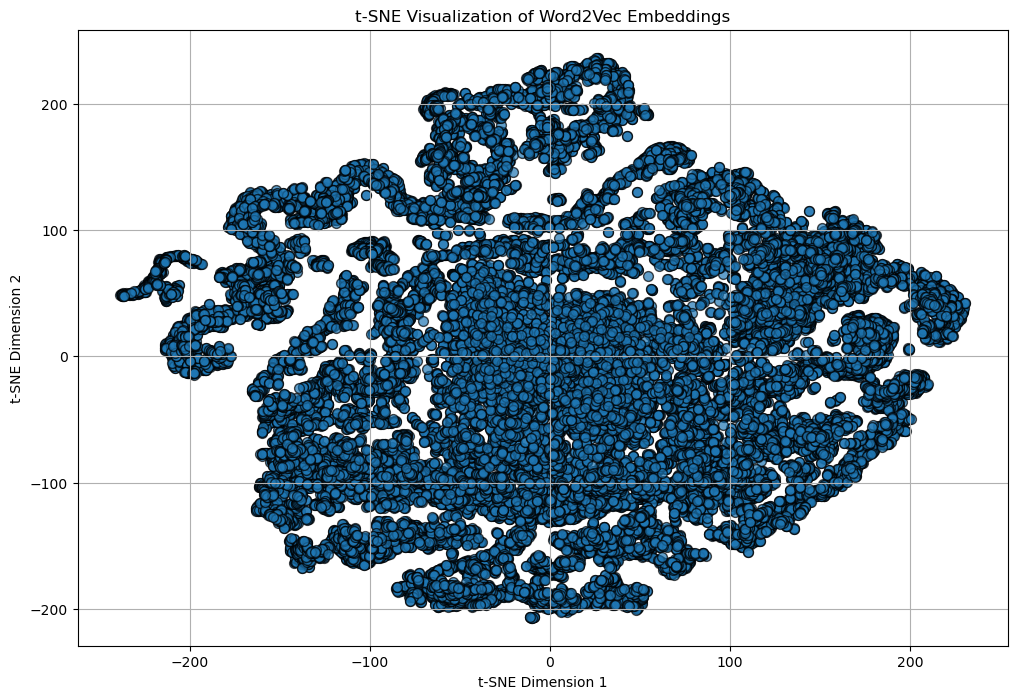

In [11]:
visualize_embeddings_t_sne(model, n_words=10_000)


In [15]:
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])

In [16]:
word_vectors.shape

(32181, 1000)

In [21]:
pd.DataFrame(word_vectors, index=words).to_csv("../gene2vec_data/dataset/g2v_1000emb.tsv", sep="\t")

In [14]:
len(words)

32181

In [ ]:
tgs_path = "../LABELS/TG_list.tsv"
tfs_path = "../LABELS/TF_list.tsv"

tgs = pd.read_csv(tgs_path, sep="\t", header=0)
tfs = pd.read_csv(tfs_path, sep="\t", header=0)


In [ ]:
gw_nb = list(set(itertools.chain.from_iterable(sentences)))


In [ ]:
tgs_sub = tgs[tgs.ID.isin(gw_nb)]
tfs_sub = tfs[tfs.ID.isin(gw_nb)]


In [ ]:
tgs_sub.to_csv("../gene2vec_data/dataset/TG_list.tsv", sep="\t", index=False)
tfs_sub.to_csv("../gene2vec_data/dataset/TF_list.tsv", sep="\t", index=False)


In [ ]:
gtoi = dict(zip(exp.index.tolist(), range(exp.shape[0])))


In [ ]:
genes = model.wv.index_to_key
embeddings = [model.wv[gene] for gene in genes]


In [ ]:
df_emb = pd.DataFrame(embeddings)
df_emb.index = [gtoi[gene] for gene in genes]


In [ ]:
df_emb.to_csv("g2v_embeddings.tsv", sep="\t", index=True)


In [ ]:
df_emb.apply(list, axis=1).to_dict()


{20618: [-1.5874968767166138,
  -0.1953076273202896,
  -0.9973607659339905,
  1.920127272605896,
  1.0801146030426025,
  -1.6400479078292847,
  2.080129623413086,
  1.546787977218628,
  -0.2281120866537094,
  0.5080242156982422,
  2.185642957687378,
  2.08062481880188,
  -0.6533486843109131,
  1.0618175268173218,
  -0.12441622465848923,
  -1.0851866006851196,
  -1.086787462234497,
  -1.0479737520217896,
  1.0902975797653198,
  2.038639545440674,
  -1.193921685218811,
  -0.6553886532783508,
  -0.6136451959609985,
  -0.7115413546562195,
  2.979367733001709,
  -1.209863543510437,
  -1.0019549131393433,
  -1.544960379600525,
  -3.261843204498291,
  -0.35659101605415344,
  0.24070174992084503,
  0.5756065845489502,
  1.5285379886627197,
  -1.9085088968276978,
  -0.7414550185203552,
  0.643429696559906,
  0.4729120135307312,
  1.4516704082489014,
  2.2480568885803223,
  -0.13447119295597076,
  -1.733893632888794,
  2.821072816848755,
  -0.38503965735435486,
  -1.1225371360778809,
  -0.275372

In [ ]:
import pandas as pd 
import pickle

with open("/home/llan/Desktop/WUR/thesis2/neighbors/neighbor_dict.pkl", "rb") as f:
    nbs = pickle.load(f)

exp = pd.read_table("../EXP/expression.tsv", index_col=0, header=0)

with open("../GO/GO_data.txt", "r") as f:
    go_data = {}
    for line in f:
        line = line.strip()
        key, val = line.split("\t")
        key = int(key)
        val = list(map(int, val.split(" ")))
        go_data[key] = val



In [23]:
go_data


{0: [0, 1, 2, 3],
 1: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 2: [14, 15, 16, 2, 17, 18, 0, 3],
 3: [19,
  20,
  2,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  14,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  16,
  36,
  37,
  38,
  39],
 4: [28, 40, 41, 42, 43, 44, 45, 46, 2, 47, 48],
 5: [49, 0, 50, 1, 3, 2, 51, 52, 53, 54],
 6: [55, 56, 57, 5],
 7: [58, 59, 2, 60, 9, 61, 62],
 8: [63, 64, 59, 9, 58, 61, 5],
 9: [65, 66, 67, 68, 44, 69, 70, 71, 72, 46, 28],
 10: [2, 12],
 11: [28, 14, 50, 73, 74, 75, 76, 77, 78, 66, 79, 80, 81, 13],
 12: [2, 12],
 13: [50, 14, 82, 83, 84, 85, 86, 28, 87, 88, 89],
 14: [12, 2, 90, 91],
 15: [14, 2, 92, 15, 93],
 16: [94, 91, 5, 12],
 17: [90],
 18: [90, 95, 96, 97],
 19: [98, 8, 2, 99, 94, 100, 101, 45],
 20: [102, 103, 104, 105, 0, 106, 107, 2, 108],
 21: [28, 109, 110, 111, 112],
 22: [14, 2],
 23: [68, 113, 14, 114, 115, 13, 116, 5, 117, 118, 119],
 24: [5, 12],
 25: [0, 3, 2],
 26: [0, 14, 1, 2, 3, 28, 120],
 27: [69, 90, 121, 122],
 28: [90, 95

In [ ]:
jkkkimport os 
os.getcwd()


'/home/llan/Desktop/WUR/thesis2/Code'

## visualize the embedding (but than from the tsv file instead of the model)


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np


In [3]:
g2v_emb = "/home/llan/Desktop/WUR/thesis2/gene2vec_data/dataset/g2v_embeddings.tsv"
g2v = pd.read_table(g2v_emb, header=0, index_col=0)
row_data = pd.read_table("/home/llan/Desktop/WUR/thesis2/EXP/EXP_data/rowdata.csv")
exp = pd.read_table("/home/llan/Desktop/WUR/thesis2/EXP/EXP_data/expression.csv",index_col=0)
col_data=pd.read_table("/home/llan/Desktop/WUR/thesis2/EXP/EXP_data/coldata.csv", index_col=0)


In [38]:
genetoi = {gene:i for i, gene in exp.reset_index().GeneID.to_dict().items()}


In [40]:
f = lambda x: genetoi[x]


In [58]:
labels = row_data[["GeneID", "locustype"]].copy()
labels["GeneID"] = labels["GeneID"].apply(f)
labels = labels.set_index("GeneID")
g2v_merged = pd.merge(g2v, labels, left_index=True, right_index=True)


In [60]:
g2v_merged.iloc[:, :-1]


0         1         2         3         4         5         6  \
24706  1.568677  1.631622  0.119945  0.771625 -0.899330 -1.031793  1.208614   
4883  -0.723175 -0.244352 -0.055876  0.404235  0.406924 -2.307787 -0.175827   
24588 -0.184121  1.212518  1.918751 -0.447811  0.052049 -2.213879  1.522863   
5374  -0.166346  0.001834 -0.445775  0.248312  0.196083 -1.259047  0.140674   
20518  1.189372 -1.279634 -1.041846 -2.680534  0.025763 -0.000362  2.968912   
...         ...       ...       ...       ...       ...       ...       ...   
1552   0.014730  0.002724  0.132077 -0.020328 -0.019669 -0.059745 -0.050580   
8628  -0.072972  0.038816  0.093389 -0.003401 -0.064729 -0.029800 -0.052376   
202   -0.037385  0.034734  0.054736  0.010230 -0.036009 -0.039968 -0.047445   
3601   0.001528  0.083215  0.170878  0.006951 -0.088612 -0.156325 -0.112643   
30713 -0.002974  0.076178  0.060468 -0.026905 -0.078079 -0.117938 -0.114929   

              7         8         9  ...        90        91        92  \
24706  3.020828  0.048907 -1.233505  ... -3.400109  0.009944  0.681104   
4883   0.431764  1.598332 -2.636484  ... -1.096317 -0.067455 -0.312058   
24588  1.264264  0.664590  0.252343  ... -1.134392  0.111970  2.245530   
5374   2.223567  0.110178 -0.675755  ... -0.770582 -0.237344  3.655307   
20518  0.201538 -1.040744 -0.190351  ...  0.177983 -2.017023  0.954407   
...         ...       ...       ...  ...       ...       ...       ...   
1552   0.124199  0.050036 -0.022099  ... -0.100078 -0.026032  0.099223   
8628   0.096334 -0.010801  0.010337  ...  0.017896 -0.087150  0.087778   
202    0.098287  0.046143 -0.099476  ... -0.040611 -0.099705  0.099404   
3601   0.153788  0.068668 -0.053025  ... -0.139556 -0.056606  0.120066   
30713  0.101832  0.026184 -0.048501  ... -0.039536 -0.053608  0.101627   

             93        94        95        96        97        98        99  
24706 -0.000046 -0.445416  1.259316 -1.523835 -1.137699 -0.277666  2.257707  
4883  -0.801306  0.343842 -0.871584  2.822859 -2.177554 -0.214012  0.116603  
24588 -0.399459 -0.545620  1.096907  0.093931 -0.895952 -0.778729 -0.423828  
5374  -0.065836 -2.031344 -0.726406  1.987337 -4.830619 -0.917032  1.862046  
20518 -0.138475  2.519109 -0.355223  0.465685 -1.228564 -1.223137  1.071640  
...         ...       ...       ...       ...       ...       ...       ...  
1552   0.039844 -0.000485  0.047409  0.012425 -0.075102  0.004089  0.123414  
8628  -0.030314  0.015386  0.019778  0.042848 -0.053239  0.039736  0.071528  
202   -0.010209  0.008153  0.066019  0.029942 -0.019235  0.052010  0.059085  
3601  -0.027897  0.041622  0.087281  0.036381 -0.086841 -0.025253  0.097873  
30713 -0.009744  0.068478  0.013189  0.063263 -0.010792  0.001812  0.030577  

[32181 rows x 100 columns]

In [61]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=10000)
reduced_embeddings = tsne.fit_transform(g2v_merged.iloc[:,:-1])


/home/llan/miniconda3/envs/torch/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [101]:
dir(tsne)


['_EXPLORATION_MAX_ITER',
 '_N_ITER_CHECK',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_params_vs_input',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_fit',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_max_iter',
 '_more_tags',
 '_n_features_out',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_tsne',
 '_validate_data',
 '_validate_

In [105]:
tsne_emb = pd.DataFrame(reduced_embeddings, index=g2v_merged.index)
tsne_emb = pd.merge(tsne_emb, labels, left_index=True, right_index=True)


In [ ]:
tsne_emb.locustype.value_counts(dropna=True).shape



(11,)

In [ ]:
tsne_emb.iloc[:, 0]


24706   -130.840622
4883      60.292820
24588   -143.690384
5374      62.380077
20518   -104.747482
            ...    
1552     -12.637756
8628      -1.296843
202       -3.635847
3601     -40.831512
30713    -25.243990
Name: 0, Length: 32181, dtype: float32

transposable_element_gene
protein_coding
pseudogene
long_noncoding_rna
antisense_long_noncoding_rna
pre_trna
other_rna
small_nuclear_rna
small_nucleolar_rna
antisense_rna
ribosomal_rna


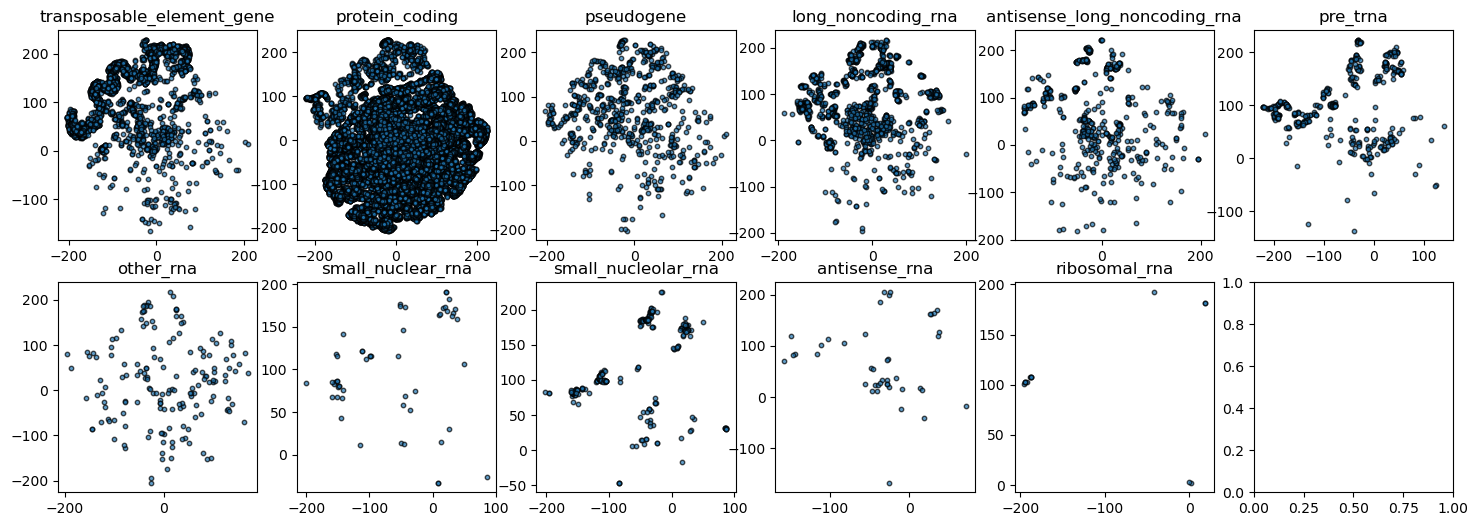

In [128]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(3 *6, 3*2))

ii = 0
for i in range(2):
    for j in range(6):
        if ii < 11:
            group = tsne_emb.locustype.dropna().unique()[ii]
            data = tsne_emb.loc[tsne_emb.locustype == group]
            print(group)
            ax[i,j].set_title(group)
            ax[i,j].scatter(data.iloc[:,0], data.iloc[:, 1], s=10, alpha=0.7, edgecolors='k')
            ii += 1


In [ ]:
for g in g2v_merged.locustype.unique():
    


transposable_element_gene
protein_coding
pseudogene
long_noncoding_rna
antisense_long_noncoding_rna
pre_trna
other_rna
small_nuclear_rna
small_nucleolar_rna
antisense_rna
ribosomal_rna
nan


In [ ]:

# Plot the embeddings
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=10, alpha=0.7, edgecolors='k', labels=)

plt.title('t-SNE Visualization of Word2Vec Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7313bfe0c040> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7312b9bcc7c0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [72]:
from sklearn.cluster import KMeans

inertias = []
for n in range(5, 150):
    fitted = KMeans(n_clusters=n).fit(g2v.iloc[:,:-1])
    inertias.append(fitted.inertia_)


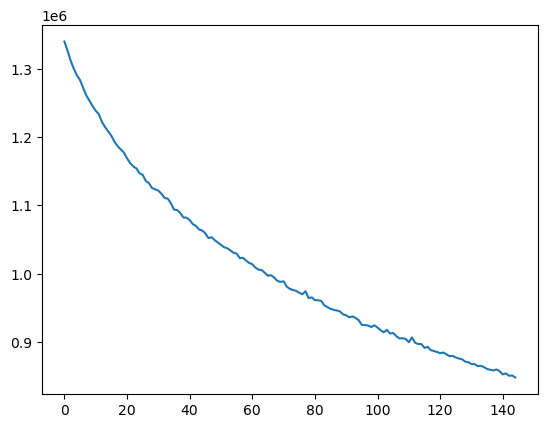

In [73]:
plt.plot(inertias)


In [129]:
inertias = []
for n in range(5, 150):
    fitted = KMeans(n_clusters=n).fit(reduced_embeddings)
    inertias.append(fitted.inertia_)


<BarContainer object of 145 artists>

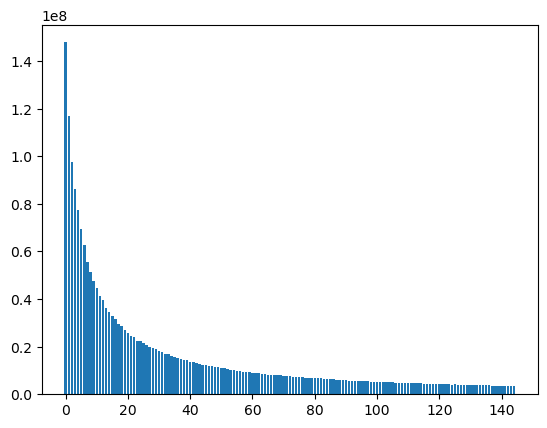

In [133]:
plt.bar(list(range(len(inertias))), inertias)


In [179]:
fitted = KMeans(n_clusters=15).fit(reduced_embeddings)
labels = fitted.labels_


In [180]:
tsne_emb["cluster"] = labels


<Axes: xlabel='0', ylabel='1'>

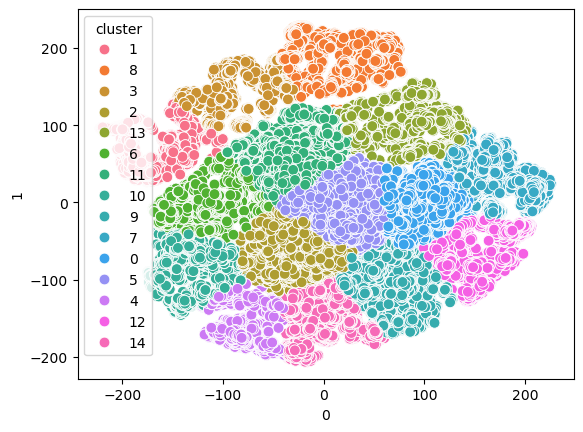

In [182]:
import seaborn as sns

sns.scatterplot(data=tsne_emb, x=0, y=1, hue=tsne_emb["cluster"].astype(str), s=60)



In [191]:
island = tsne_emb.loc[tsne_emb["cluster"].isin([1, 8, 3])].locustype.value_counts().to_dict()


([<matplotlib.patches.Wedge at 0x7312be0d1090>,
 [Text(-0.02667926793253317, 1.099676414525011, 'transposable_element_gene'),
  Text(-0.8643068508277924, -0.6804216836728122, 'protein_coding'),
  Text(0.046606039450705655, -1.0990122279059134, 'long_noncoding_rna'),
  Text(0.565835128536291, -0.9433083309895652, 'pre_trna'),
  Text(0.8322140629247813, -0.7193189511407497, 'pseudogene'),
  Text(0.9948147849430562, -0.4694076518961969, 'antisense_long_noncoding_rna'),
  Text(1.0750848440425842, -0.23279299411694634, 'small_nucleolar_rna'),
  Text(1.0956954943449122, -0.09721822705778367, 'small_nuclear_rna'),
  Text(1.0986772433467555, -0.0539287952023247, 'other_rna'),
  Text(1.099737249235014, -0.024041269621321477, 'antisense_rna'),
  Text(1.099977490582884, -0.007037059825074029, 'ribosomal_rna')])

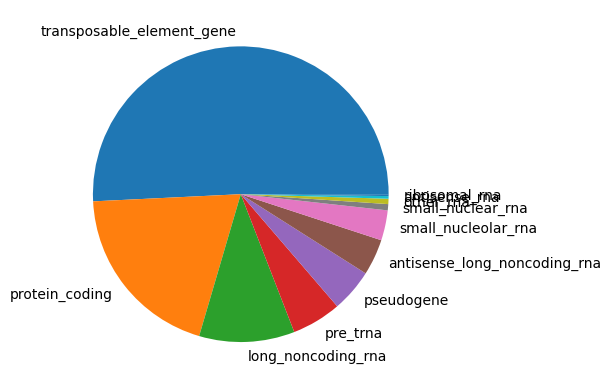

In [195]:
plt.pie(island.values(), labels=island.keys())


In [197]:
tsne_emb["island"] = tsne_emb["cluster"].apply(lambda x: 1 if x in [1, 3, 8] else 0)


<Axes: xlabel='0', ylabel='1'>

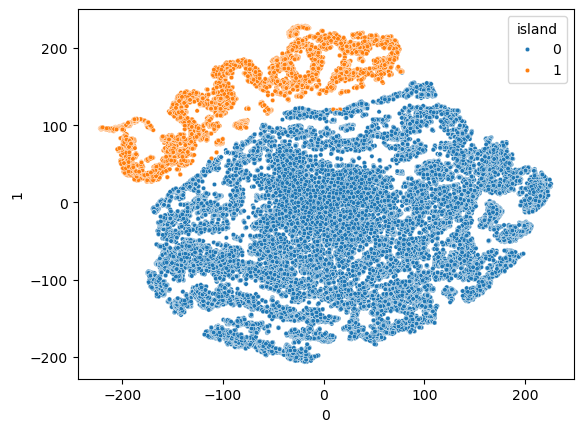

In [201]:
sns.scatterplot(tsne_emb, x=0, y=1, hue="island", s=10)


In [ ]:
tsne_emb


0           1                  locustype  cluster  island
24706 -130.840622  102.723030  transposable_element_gene        1       1
4883    60.292820  171.037552  transposable_element_gene        8       1
24588 -143.690384  109.882637  transposable_element_gene        1       1
5374    62.380077  212.970627  transposable_element_gene        8       1
20518 -104.747482  163.436691  transposable_element_gene        3       1
...           ...         ...                        ...      ...     ...
1552   -12.637756    7.125362         long_noncoding_rna        5       0
8628    -1.296843   47.351452             protein_coding       11       0
202     -3.635847    5.441935             protein_coding        5       0
3601   -40.831512   25.041723             protein_coding       11       0
30713  -25.243990   -0.205715             protein_coding        5       0

[32181 rows x 5 columns]

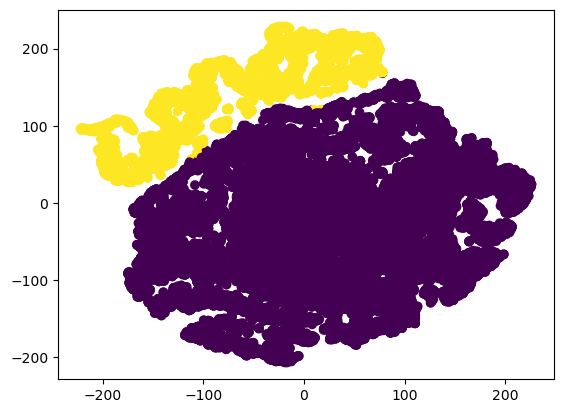

In [ ]:
plt.scatter(tsne_emb[0], tsne_emb[1], c=tsne_emb["island"])


In [203]:
tsne_emb.to_csv("tsne_embedding_g2v.tsv", sep="\t")


In [175]:
np.where(fitted.cluster_centers_[:,0] < 100)


(array([ 0,  2,  3,  5,  6,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18, 19]),)

In [156]:
fitted = KMeans(n_clusters=20).fit(g2v)
labels = fitted.labels_


In [ ]:
tsne_emb["cluster"] = labels


<Axes: xlabel='0', ylabel='1'>

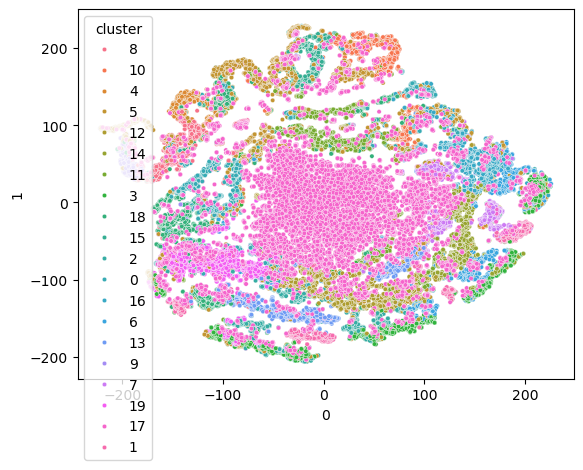

In [ ]:
sns.scatterplot(data=tsne_emb, x=0, y=1, hue=tsne_emb["cluster"].astype(str), s=10)


transposable_element_gene
protein_coding
pseudogene
long_noncoding_rna
antisense_long_noncoding_rna
pre_trna
other_rna
small_nuclear_rna
small_nucleolar_rna
antisense_rna
ribosomal_rna


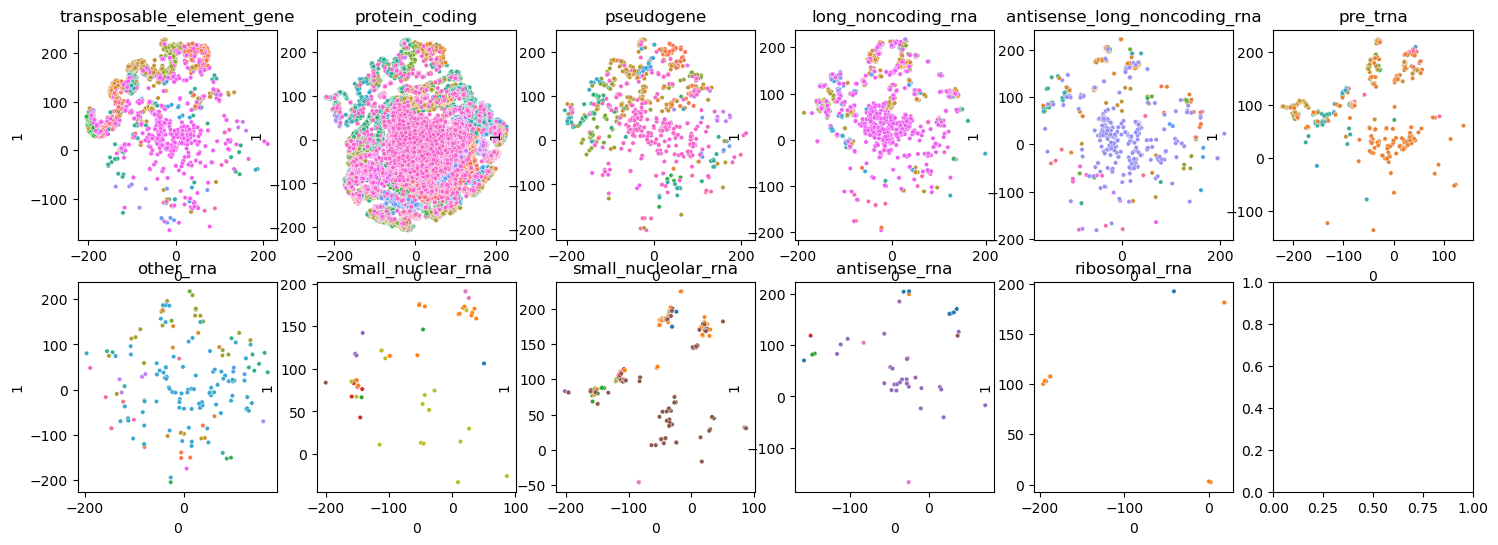

In [164]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(3 *6, 3*2))

ii = 0
for i in range(2):
    for j in range(6):
        if ii < 11:
            group = tsne_emb.locustype.dropna().unique()[ii]
            data = tsne_emb.loc[tsne_emb.locustype == group]
            print(group)
            ax[i,j].set_title(group)
            sns.scatterplot(data=data, x=0, y=1, ax=ax[i,j], hue=data["cluster"].astype(str), s=10)
            ax[i,j].legend().remove()
            
            ii += 1
